<a href="https://colab.research.google.com/github/macgeargear/LEARNING/blob/main/TFCourse2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.losses import MeanSquaredError
from keras.optimizers import SGD

import pickle

# Perceptron with TF

In [ ]:

d_in = (2,)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=d_in),
    tf.keras.layers.Activation('sigmoid')
])
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = [[0,0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0] # OR

history = model.fit(X,Y, epochs=500)


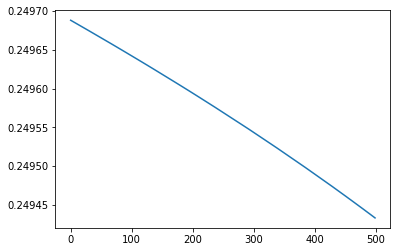

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
Z = model.predict(X)
print(tf.round(Z))

### Multi-Layer Perceptron (MLP)
add hidden layers between input and output linear

In [ ]:
X = [[0,0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0] # XOR


d_in = (2,)

# multi layer perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=d_in),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid'),

])
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))
# model.summary()

# Tensor Operations

In [ ]:
# Constant: connot change
tf.constant([1,2,3])

# Vairable: can change
tf.Variable([1,2,3])

# From numpy
A = tf.constant(np.array([[1,2,3]]))

# To numpy
A = A.numpy

# Ones, Zero
A = tf.ones((2,3), dtype=tf.float32)

C = tf.eye(2)
print(C)

# Concatenation
# Transpose
# Reshape
# Change dtype --> tf.cast
# Multiplication
#   - Element-wise: *
#   - Matrix Multiplication: @

tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)


# Lineaer and Nonlinear Regression

## Linear 

In [ ]:
# sol
N = 100
x = np.random.rand(N)
y = 5*x + 10 + 0.1*np.random.rand(N)


In [ ]:
# Linear Reg with gradient tape
# w = np.random.rand() # .rand() -> uniform random
# b = np.random.rand() # .randN() -> normal distribution

w = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
lr = 0.1

for epoch in range(1000):
    with tf.GradientTape() as t:
        Y = w*x + b
        loss = tf.reduce_mean((Y-y)**2) # MSE
    dw, db = t.gradient(loss, [w,b]) # de/dw de/db
    w.assign_sub(lr*dw) # W -= lr *dw
    b.assign_sub(lr*db) # b -= lr *db
    print(epoch+1, w.numpy(), b.numpy(), loss.numpy())




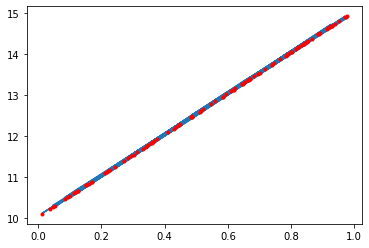

In [ ]:
pred = w*x + b
plt.plot(x,y)
plt.plot(x,pred,'.r')

use keras

In [ ]:
d_in = (1,)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=d_in),
])
model.compile(loss=tf.keras.losses.MeanSquaredError(), tf.kerasoptimizer=tf.keras.optimizer.SGD(learning_rate=0.1))
model.fit(x,y)
pred = model.predict(x)
plt.plot(x,y, '.r')
plt.plot(x,pred)

## Non-linear

In [ ]:
def relu(x):
    return tf.where(x>=0, x, 0)

class MLP():
    def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
        self.w = []
        self.activation = activation
        for i in range(1, len(neurons)):
            # w
            self.w.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i])))
            # b
            self.w.append(tf.Variable(np.random.randn(neurons)))
    def __call__(self, x):
        for i in range(0, len(self.w), 2):
            x = x @ self.w[i] + self.w[i+1]
            if self.activation[i // 2] is not None:
                x = self.activation[i//2](x)
        return x
    def fit(self, x, y, lr=0.0001, epochs=2000):
        for epoch in range(7000):
            with tf.GradientTape() as t:
                loss = tf.reduce_mean((self(x)-y)**2)
            dw = t.gradient(loss, self.w)
            for i, w in enumerate(self.w):
                w.assign_sub(lr*w[i])
            if epoch % 1000 == 0:
                print(epoch, loss.numpy())

In [ ]:
lr = 0.001
model = MLP()
model.fit(x,y, lr, 7000)
Z = model(x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Work with mnist

In [ ]:
!nvidia-smi

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()

In [ ]:
Xtrain.shape
Xtrain[:, :, :, None].shape
Ytrain[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

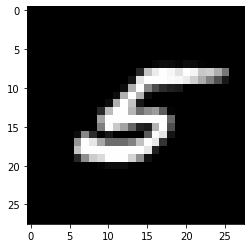

In [ ]:
plt.imshow(Xtrain[899], cmap='gray')
plt.show()

In [ ]:
Xtrain = Xtrain.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)
Xtrain.shape
Ytrain.shape

(60000,)

# One-Hot Encoder


How?

In [ ]:
def onehot(y, nclass=10):
    y_ = np.zeros((y.shape[0], nclass))
    for i, y in enumerate(y):
        y_[i, y[i]] = 1
    return y_
# or use keras
# Ytrain = onehot(Ytrain)
# Ytest = onehot(Ytest)
Ytrain = tf.keras.utils.to_categorical(Ytrain, num_classes=10)
Ytest = tf.keras.utils.to_categorical(Ytest, num_classes=10)



training

In [ ]:
d_in = (Xtrain.shape[1], )
model = tf.keras.Sequential([
    Dense(200, input_shape=d_in, activation='relu'),
    Dense(200, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss=MeanSquaredError(), optimizer='adam')
model.fit(Xtrain/255. , Ytrain, epochs=50, validation_data=(Xtest, Ytest))


Predict

In [ ]:
pred = model.predict(Xtest/255.)
print(np.sum(pred.argmax(axis=1) == Ytest.argmax(axis=1)) / len(Ytest))

313/313 [==============================] - 0s 1ms/step
0.8898


In [ ]:
print(pred[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Convolutinoal Neural Network (CNN)

### 2-D Discrete Cross-correlation
- original purpose: Measure of similarity of two signal
- Filtering

## Cross-Entropy
- Entropy = measure the uncertainty
- Cross-Entropy (cross =between 2 distributions )
- Categorical Cross-Entropy: Multiple classes version of Cross-Entropy
 - target must be encode with one-hot format
- Sparse Categorical Cross-Entropy
 - No need to encode in one-hot format
 - use the index as class label
   - begin with o to #class-1

# Lenet5 with TF

In [ ]:
model = tf.keras.Sequential([
    # 2D
    Conv2D(6, (5,5), input_shape=(32, 32, 1), activation='relu'),
    MaxPool2D(),
    Conv2D(16, (5,5), activation='relu'),
    MaxPool2D(),

    # MLP 1D
    layers.Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
# model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# LeNet5 with MNIST
- Preprocessing
 - Rescale to [0,1]
 - Resize to 32*32
- Training
- Prediction

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:, :, :, None] / 255.
Xtest = Xtest[:, :, :, None] /255.
Xtrain = tf.image.resize(Xtrain, (32, 32))
Xtest = tf.image.resize(Xtest, (32, 32))
Xtrain.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
history = model.fit(Xtrain, Ytrain, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 380ms/step - loss: 2.3739
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 2.2402
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 2.1232
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 2.0038
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 1.8659
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 1.6997
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 1.4998
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 1.2668
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 1.0078
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.7393
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4896
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.2896
Epoch 13/50
1/1 [==============================] - 0s 8ms/step - 

In [ ]:
Ztest = model.predict(Xtest)
print(np.sum(Ztest.argmax(axis=1) == Ytest) / len(Ztest))

ValueError: ignored

# Transfer Learning

In [ ]:
import pickle
data = pickle.load(open('thainumber_28.pkl' ,'rb'))
X = data['X']
Y = data['Y']


(1665, 28, 28, 1)

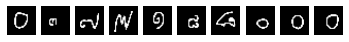

In [ ]:
n = 10
for j, i in enumerate(np.random.choice(len(X), n)):
    plt.subplot(1, n, j+1)
    plt.imshow(X[i,:,:,0], cmap='gray')
    plt.axis('off')
plt.savefig('thai.png')
plt.show()

In [ ]:
from skimage.transform import resize

_X = []
for x in X:
    _X.append(resize(x, (32, 32)))
X = np.array(_X)
del _X

In [ ]:
np.random.permutation(10)
len(X)

1665

In [ ]:
idx = np.random.permutation(np.arange(len(x)))
split = 1665 * 8 // 10
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain, Ytrain = X[train_idx] / 255. , Y[train_idx].astype(np.int)
Xtest, Ytest = X[test_idx] / 255. , Y[test_idx].astype(np.int)



In [ ]:
model.fit(X, Y, epochs=25)

In [ ]:
Ztest = model.predict(X)
print(np.sum(Ztest.argmax(axis=1) == Ytest) / len(Ztest))

53/53 [==============================] - 0s 3ms/step
0.0


<ipython-input-86-bdcc066cd09a>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(Ztest.argmax(axis=1) == Ytest) / len(Ztest))


# VGG
- Deeper network: VGG16
 - Better performance
 - More memory required
 - Longer training time

## VGG 16

In [ ]:
model = tf.keras.Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    layers.Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy)

## MNIST with VGG16
How ?
- Make input meet the requiredment
 - Gray to GRB by duplication all color channels with the same values 
 - Resize image
- Create new input layer before the first layer of network
 - Convolutional Layer
 - Upsampling Layer
- The number of node in the last Dense layer should be the number of classes(MNIST = 10)

In [ ]:
# this will out of memory error! --> use minibatch instead
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain[:, :, :, None] / 255.
Xtest = Xtest[:, :, :, None] / 255.
# Xtrain = tf.image.grayscale_to_rgb(Xtrain)
# Xtest = tf.image.grayscale_to_rgb(Xtest)
# Xtrain = tf.image.resize(Xtest, (224, 224))
# Xtest = tf.image.grayscale_to_rgb(Xtest)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()
batch = 128
datagen.fit(Xtrain)
num_batch = len(Xtrain) / batch
Progbar = tf.keras.utils.Progbar(num_batch)
for epoch in range(50):
    batches = 0
    for x, y in datagen.flow(Xtrain, Ytrain, batch_size=batch):
        x = tf.image.resize(x, (224, 244))
        x = tf.image.grayscale_to_rgb(x)
        history = model.fit(x, y, verbose=0)
        batches += 1
        Progbar.update(batches, values=[('loss', history.history['loss'][0])])
        if batches >= num_batch:
            print(epoch)
            break